# User Churn Prediction

In this project, we use supervised learning models to identify customers who are likely to stop using service in the future. Furthermore, we will analyze top factors that influence user retention.

## Contents

<ul>
<li>[Part 1: Data Exploration](#Part-1:-Data-Exploration)
<li>[Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
<li>[Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
<li>[Part 4: Feature Selection](#Part-4:-Feature-Selection)
</ul>

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [4]:
#ignore Python warning.
import warnings
warnings.filterwarnings('ignore')

# show multiple outputs in cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import sklearn
pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('./churn.all')

In [5]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [7]:
print("Num of rows: " + str(churn_df.shape[0]) )
print("Num of columns: " + str(churn_df.shape[1])) 

Num of rows: 5000
Num of columns: 21


### Part 1.2: Data cleaning

Remove Extra Whitespace

In [8]:
churn_df['voice_mail_plan'][0]

' yes'

In [9]:
churn_df['churned'][0]

' False.'

In [10]:
churn_df['voice_mail_plan'][0]

' yes'

In [11]:
churn_df['intl_plan'][0]

' no'

In [12]:
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].map(lambda x: x.strip())
churn_df['intl_plan'] = churn_df['intl_plan'].map(lambda x: x.strip())
churn_df['churned'] = churn_df['churned'].map(lambda x: x.strip().rstrip('.'))

### Part 1.3:  Understand the features

In [13]:
churn_df['churned'].value_counts()

False    4293
True      707
Name: churned, dtype: int64

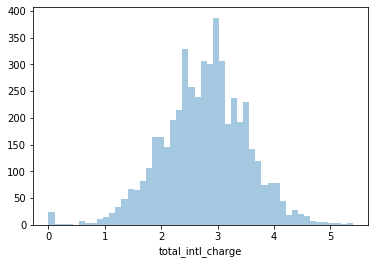

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(churn_df['total_intl_charge'], kde=False)

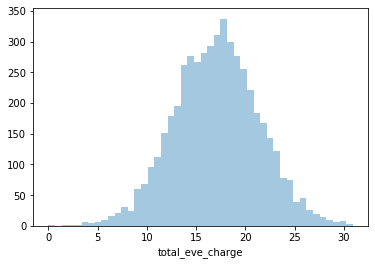

In [15]:
sb.distplot(churn_df['total_eve_charge'], kde=False)

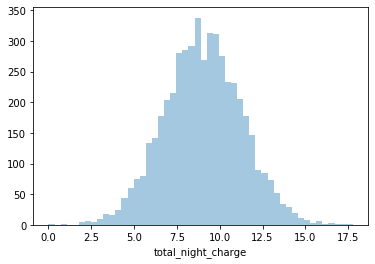

In [16]:
sb.distplot(churn_df['total_night_charge'], kde=False)

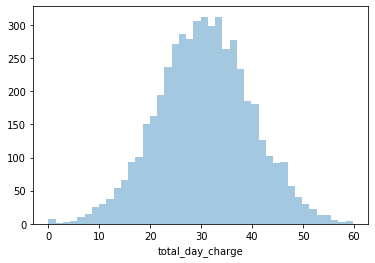

In [17]:
sb.distplot(churn_df['total_day_charge'], kde=False)

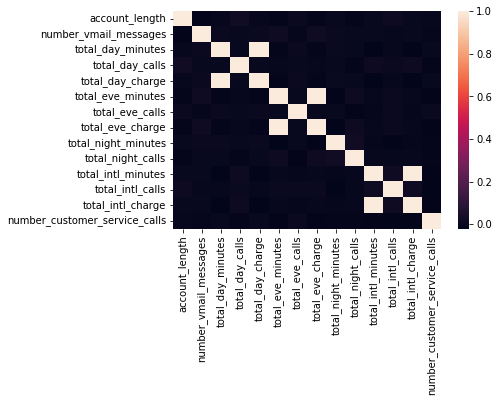

In [18]:
#Check correlation between numerical variables.
corr = churn_df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge", "number_customer_service_calls"]].corr()

sb.heatmap(corr)

In [19]:
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.001291,0.014277,0.001292,-0.001445
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.002463,0.000124,0.002505,-0.007086
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,-0.019486,-0.001303,-0.019415,0.002733
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.013097,0.010893,0.013161,-0.010739
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,-0.019490,-0.001307,-0.019419,0.002726
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,0.000137,0.008388,0.000159,-0.013823
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,-0.007458,0.005574,-0.007507,0.006235
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,0.000132,0.008393,0.000155,-0.013836
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,-0.006721,-0.017214,-0.006655,-0.008533
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.000391,-0.000156,0.000368,-0.008283


In [20]:
#Check Pearson correlation
from scipy.stats import pearsonr
print(pearsonr(churn_df['total_day_minutes'], churn_df['total_day_charge'])[0])
print(pearsonr(churn_df['total_eve_minutes'], churn_df['total_eve_charge'])[0])
print(pearsonr(churn_df['total_intl_minutes'], churn_df['total_intl_charge'])[0])
# do some feature preprocessing on these features

0.9999999509831994
0.9999997748632399
0.9999926570208368


# Part 2: Feature Preprocessing

In [21]:
churn_df.head()
churn_df['voice_mail_plan'][0]

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


'yes'

In [22]:
y = np.where(churn_df['churned'] == 'True',1,0)

# Drop some useless columns
to_drop = ['state','area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

## get feature matrix
X = churn_feat_space

#### ? add catogorical features, e.g. state, into the feature matrix?

In [23]:
churn_df.info()
print(churn_df['intl_plan'].isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   intl_plan                      5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [24]:
# List unique values in 'state' column.
churn_df.area_code.unique()

array([415, 408, 510])

In [26]:
# One-Hot Encoding
# Add categorical variable ('area_code')
to_drop_1 = ['state','phone_number','churned']
churn_feat_space_withstate = churn_df.drop(to_drop_1, axis=1)

yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space_withstate[yes_no_cols] = churn_feat_space_withstate[yes_no_cols] == 'yes'

churn_feat_space_onehot=churn_feat_space_withstate.copy()

churn_feat_space_onehot=pd.get_dummies(churn_feat_space_onehot,columns=['area_code'], prefix=['area_code'])
churn_feat_space_onehot.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0


In [27]:
churn_feat_space_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 5000 non-null   int64  
 1   intl_plan                      5000 non-null   bool   
 2   voice_mail_plan                5000 non-null   bool   
 3   number_vmail_messages          5000 non-null   int64  
 4   total_day_minutes              5000 non-null   float64
 5   total_day_calls                5000 non-null   int64  
 6   total_day_charge               5000 non-null   float64
 7   total_eve_minutes              5000 non-null   float64
 8   total_eve_calls                5000 non-null   int64  
 9   total_eve_charge               5000 non-null   float64
 10  total_night_minutes            5000 non-null   float64
 11  total_night_calls              5000 non-null   int64  
 12  total_night_charge             5000 non-null   f

In [ ]:
####
## added code for categorical feature 
####

### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels:", np.unique(y))

Feature space holds 5000 observations and 17 features
Unique target labels: [0 1]


In [29]:
X
X.shape  # matrix size (5000, 17)

array([[ 0.69894149, -0.32324017,  1.66712012, ..., -0.58423577,
        -0.0955088 , -0.43667564],
       [ 0.16984882, -0.32324017,  1.66712012, ..., -0.58423577,
         1.24598231, -0.43667564],
       [ 0.92569549, -0.32324017, -0.5998368 , ...,  0.22991664,
         0.69597096, -1.20223603],
       ...,
       [-0.98911606, -0.32324017, -0.5998368 , ..., -0.17715957,
         1.20573758, -0.43667564],
       [ 0.2202386 , -0.32324017, -0.5998368 , ...,  0.63699285,
        -0.63210525, -1.20223603],
       [-0.35924384, -0.32324017,  1.66712012, ...,  4.70775494,
        -0.35039211, -1.20223603]])

(5000, 17)

# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [30]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 4000 observation with 17 features
test data has 1000 observation with 17 features


### Part 3.2: Model Training and Selection

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()
# classifier_svm = svm.SVC(kernel='linear')

#### tuning hyperparameter

In [32]:
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0
for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    # Evaluate a score by cross-validation.
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.869
Model accuracy of KNN is: 0.900
Model accuracy of Random Forest is: 0.957


### (Optional) Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [33]:
from sklearn.model_selection import GridSearchCV
def print_grid_search_metrics(gs):
    print("Best score: %0.3f" % gs.best_score_)
    print("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [34]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
#     'solver':('liblinear', 'newton-cg')
}
Grid_LR = GridSearchCV(LogisticRegression(), parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
print_grid_search_metrics(Grid_LR)

Best score: 0.869
Best parameters set:
	C: 1
	penalty: 'l2'


In [36]:
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [37]:
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [38]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.900
Best parameters set:
	n_neighbors: 5


In [39]:
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [40]:
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [41]:
print_grid_search_metrics(Grid_RF)

Best score: 0.956
Best parameters set:
	n_estimators: 60


In [42]:
best_RF_model = Grid_RF.best_estimator_

### Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print(classifier)
    print("Accuracy is: %0.3f" % accuracy)
    print("precision is: %0.3f" % precision)
    print("recall is: %0.3f" % recall)

def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

In [ ]:
# confusion_matrix(y_true, y_pred, labels=None, sample_weight=None): function. 

Random Forest
Accuracy is: 0.957
precision is: 0.917
recall is: 0.771


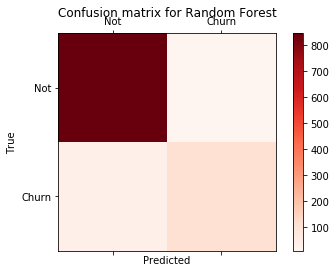

Logistic Regression
Accuracy is: 0.854
precision is: 0.481
recall is: 0.181


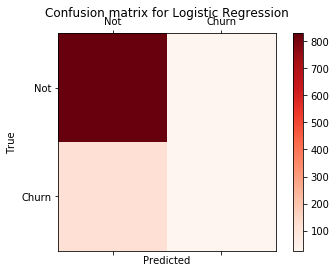

KNN
Accuracy is: 0.896
precision is: 0.786
recall is: 0.382


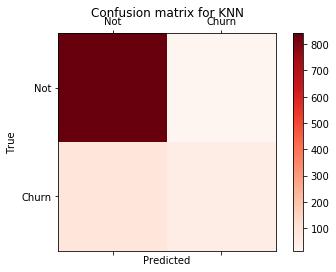

In [45]:
%matplotlib inline

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("KNN", confusion_matrix(y_test,best_KNN_model.predict(X_test))),
#     ("SVM", confusion_matrix(y_test,best_SVM_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier and LogisticRegression have predict_proba() function 

#### Part 3.4.1: ROC of RF Model

In [ ]:
# y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]：X_test预测的每一个数是1的概率

In [46]:
from sklearn.metrics import roc_curve
from sklearn import metrics
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve - RF model')

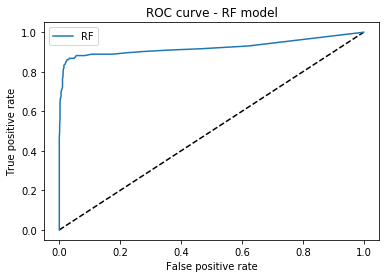

In [47]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [48]:
from sklearn import metrics
metrics.auc(fpr_rf,tpr_rf)

0.9236760124610592

#### Part 3.4.1: ROC of LR Model

In [49]:
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve - LR Model')

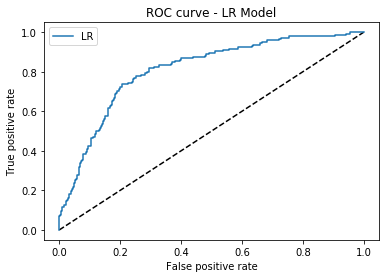

In [50]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [51]:
metrics.auc(fpr_lr,tpr_lr)

0.8088411863966771

#### Part 3.4.1: ROC of KNN Model

In [52]:
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve - KNN Model')

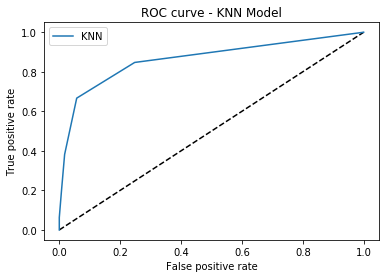

In [53]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [54]:
metrics.auc(fpr_knn, tpr_knn)

0.8637598974558671

# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).

In [55]:
LRmodel_l1 = LogisticRegression(penalty="l1", solver='liblinear')
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]

print("Logistic Regression (L1) Coefficients")
# for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
#                       churn_feat_space.columns), key=f(k,v) ):#lambda k,v: -abs(k),v):
#     print(v + ": " + str(k))
    
for item in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_feat_space.columns)):
    print(item[1] + ": " + str(item[0]))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

array([ 0.053359  ,  0.61299193, -0.86591604,  0.3962309 ,  0.2314358 ,
        0.04945815,  0.50300457,  0.23554116, -0.02836398,  0.12221716,
        0.03806097, -0.02877141,  0.16361809,  0.17155187, -0.17427755,
        0.07180084,  0.67297591])

Logistic Regression (L1) Coefficients
voice_mail_plan: -0.8659
total_intl_calls: -0.1743
total_night_calls: -0.0288
total_eve_calls: -0.0284
total_night_minutes: 0.0381
total_day_calls: 0.0495
account_length: 0.0534
total_intl_charge: 0.0718
total_eve_charge: 0.1222
total_night_charge: 0.1636
total_intl_minutes: 0.1716
total_day_minutes: 0.2314
total_eve_minutes: 0.2355
number_vmail_messages: 0.3962
total_day_charge: 0.503
intl_plan: 0.613
number_customer_service_calls: 0.673


In [56]:
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_feat_space.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print(v + ": " + str(k))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

array([ 0.05534002,  0.6148644 , -0.89802312,  0.42620175,  0.36945883,
        0.05155591,  0.36853956,  0.18029027, -0.03048533,  0.18059919,
        0.10260365, -0.03081838,  0.10179758,  0.12276871, -0.17683388,
        0.12342212,  0.6754195 ])

Logistic Regression (L2) Coefficients
voice_mail_plan: -0.8659
number_customer_service_calls: 0.673
intl_plan: 0.613
total_day_charge: 0.503
number_vmail_messages: 0.3962
total_eve_minutes: 0.2355
total_day_minutes: 0.2314
total_intl_calls: -0.1743
total_intl_minutes: 0.1716
total_night_charge: 0.1636
total_eve_charge: 0.1222
total_intl_charge: 0.0718
account_length: 0.0534
total_day_calls: 0.0495
total_night_minutes: 0.0381
total_night_calls: -0.0288
total_eve_calls: -0.0284


### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [57]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print(v + ": " + str(k))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.1504
total_day_charge: 0.1374
number_customer_service_calls: 0.1092
intl_plan: 0.083
total_eve_charge: 0.0684
total_eve_minutes: 0.0668
total_intl_calls: 0.0599
total_intl_minutes: 0.0418
total_intl_charge: 0.0415
total_night_minutes: 0.0409
total_night_charge: 0.0389
number_vmail_messages: 0.0292
total_day_calls: 0.0289
account_length: 0.0274
total_eve_calls: 0.0264
total_night_calls: 0.0258
voice_mail_plan: 0.0242
